# 机器学习——遗传算法

### 遗传算法的科学定义

遗传算法（Genetic Algorithm, GA）是模拟达尔文生物进化论的自然选择和遗传学机理的生物进化过程的计算模型，是一种通过模拟自然进化过程搜索最优解的方法。

其借鉴生物的自然选择和遗传进化机制面开发出的一种全局优化自适应概率搜索算法

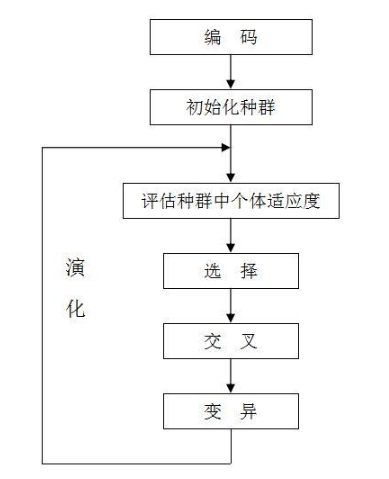

生物进化是以集团的形式共同进行的，这样一个团体被称为群体，组成群体的单个生物被称为个体，每一个个体对环境都有不同的适应能力，这种适应能力被称为适应度。大自然会对适应度进行筛选，不断优化这个种群，使这个种群达到适应性较强的一种状态

* 例子：找出一片山脉的最高峰

遗传算法：有很多袋鼠，它们降落到喜玛拉雅山脉的任意地方。这些袋鼠并不知道它们的任务是寻找珠穆朗玛峰。但每过几年，就在一些海拔高度较低的地方射杀一些袋鼠。于是，不断有袋鼠死于海拔较低的地方，而越是在海拔高的袋鼠越是能活得更久，也越有机会生儿育女。就这样经过许多年，这些袋鼠们竟然都不自觉地聚拢到了一个个的山峰上，可是在所有的袋鼠中，只有聚拢到珠穆朗玛峰的袋鼠被带回了美丽的澳洲。


* 大体实现过程

1. 首先寻找一种对问题潜在解进行“数字化”编码的方案。（建立表现型和基因型的映射关系）  
2. 随机初始化一个种群（那么第一批袋鼠就被随意地分散在山脉上），种群里面的个体就是这些数字化的编码。 
3. 接下来，通过适当的解码过程之后（得到袋鼠的位置坐标）。  
4. 用适应性函数对每一个基因个体作一次适应度评估（袋鼠爬得越高当然就越好，所以适应度相应越高）。 
5. 用选择函数按照某种规定择优选择（每隔一段时间，射杀一些所在海拔较低的袋鼠，以保证袋鼠总体数目持平。）。   
6. 让个体基因变异（让袋鼠随机地跳一跳）。  
7. 然后产生子代（希望存活下来的袋鼠是多产的，并在那里生儿育女）。  

遗传算法并不保证你能获得问题的最优解，但是使用遗传算法的最大优点在于你不必去了解和操心如何去“找”最优解。（你不必去指导袋鼠向那边跳，跳多远。）而只要简单的“否定”一些表现不好的个体就行了。（把那些总是爱走下坡路的袋鼠射杀，这就是遗传算法的精粹！）


* 由此我们可以得出遗传算法的一般步骤：  

1. 随机产生种群。
2. 根据策略判断个体的适应度，是否符合优化准则，若符合，输出最佳个体及其最优解，结束。否则，进行下一步。
3. 依据适应度选择父母，适应度高的个体被选中的概率高，适应度低的个体被淘汰。
4. 用父母的染色体按照一定的方法进行交叉，生成子代。
5. 对子代染色体进行变异。  
> 由交叉和变异产生新一代种群，返回步骤2，直到最优解产生。

编码方法可以分为三大类：二进制编码法、浮点编码法、符号编码法

#### 二进制编码法

就像人类的基因有AGCT 4种碱基序列一样。不过在这里我们只用了0和1两种碱基,然后将他们串成一条链形成染色体。一个位能表示出2种状态的信息量，因此足够长的二进制染色体便能表示所有的特征。这便是二进制编码。如下：
> 1110001010111

#### 浮点编码法

二进制编码虽然简单直观，但明显地。但是存在着连续函数离散化时的映射误差。个体长度较短时，可能达不到精度要求，而个体编码长度较长时，虽然能提高精度，但增加了解码的难度，使遗传算法的搜索空间急剧扩大。

所谓浮点法，是指个体的每个基因值用某一范围内的一个浮点数来表示。在浮点数编码方法中，必须保证基因值在给定的区间限制范围内，遗传算法中所使用的交叉、变异等遗传算子也必须保证其运算结果所产生的新个体的基因值也在这个区间限制范围内。如下所示：
> 1.2-3.2-5.3-7.2-1.4-9.7

#### 符号编码法

符号编码法是指个体染色体编码串中的基因值取自一个无数值含义、而只有代码含义的符号集如｛A,B,C…｝。
符号编码的主要优点是：

> 符合有意义积术块编码原则  
> 便于在遗传算法中利用所求解问题的专门知识  
> 便于遗传算法与相关近似算法之间的混合使用。  

#### 为我们的袋鼠染色体编码

编码无非就是建立从基因型到表现型的映射关系。这里的表现型可以理解为个体特征（比如身高、体重、毛色等等）。那么，在此问题下，我们关心的个体特征就是：袋鼠的位置坐标（因为我们要把海拔低的袋鼠给杀掉）。无论袋鼠长什么样，爱吃什么。我们关心的始终是袋鼠在哪里，并且只要知道了袋鼠的位置坐标（位置坐标就是相应的染色体编码，可以通过解码得出），我们就可以：
1. 在喜马拉雅山脉的地图上找到相应的位置坐标，算出海拔高度。（相当于通过自变量求得适应函数的值）然后判读该不该射杀该袋鼠。
2. 可以知道染色体交叉和变异后袋鼠新的位置坐标。

在上面我们把极大值比喻为山峰，那么，袋鼠的位置坐标可以比喻为区间[-1, 2]的某一个x坐标（有了x坐标，再通过函数表达式可以算出函数值 <==> 得到了袋鼠染色体编码，解码得到位置坐标，在喜马拉雅山脉地图查询位置坐标算出海拔高度）。这个x坐标是一个实数，现在，说白了就是怎么对这个x坐标进行编码。下面我们以二进制编码为例讲解，不过这种情况下以二进制编码比较复杂就是了。（如果以浮点数编码，其实就很简洁了，就一浮点数而已。）



我们说过，一定长度的二进制编码序列，只能表示一定精度的浮点数。在这里假如我们要求解精确到六位小数，由于区间长度为2 - (-1) = 3 ,为了保证精度要求，至少把区间[-1,2]分为3 × 10^6等份。又因为



> 2^21 = 2097152 < 3*10^6 < 2^22 = 4194304 

所以编码的二进制串至少需要22位。

把一个二进制串(b0,b1,....bn)转化为区间里面对应的实数值可以通过下面两个步骤：
1. 将一个二进制串代表的二进制数转化为10进制数：  
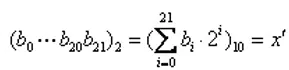

2. 对应区间内的实数：  
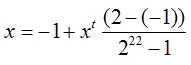
例如一个二进制串(1000101110110101000111)2通过上面换算以后，表示实数值0.637197。

上面的编码方式只是举个例子让大家更好理解而已，编码的方式千奇百怪，层出不穷,每个问题可能采用的编码方式都不一样。在这一点上要注意。

#### 评价个体的适应度--适应度函数（fitness function）

适应度函数主要是通过个体特征从而判断个体的适应度。在本例的袋鼠跳中，我们只关心袋鼠的海拔高度，以此来判断是否该射杀该袋鼠。这样一来，该函数就非常简单了。只要输入袋鼠的位置坐标，在通过相应查找运算，返回袋鼠当前位置的海拔高度就行。


适应度函数也称评价函数，是根据目标函数确定的用于区分群体中个体好坏的标准。适应度函数总是非负的，而目标函数可能有正有负，故需要在目标函数与适应度函数之间进行变换。

评价个体适应度的一般过程为：
> 对个体编码串进行解码处理后，可得到个体的表现型。  
> 由个体的表现型可计算出对应个体的目标函数值。  
> 根据最优化问题的类型，由目标函数值按一定的转换规则求出个体的适应度。  

#### 射杀一些袋鼠--选择函数（selection）

### 版本2理解

求解函数 f(x) = x + 10*sin(5*x) + 7*cos(4*x) 在区间[0,9]的最大值。

函数大概长这样

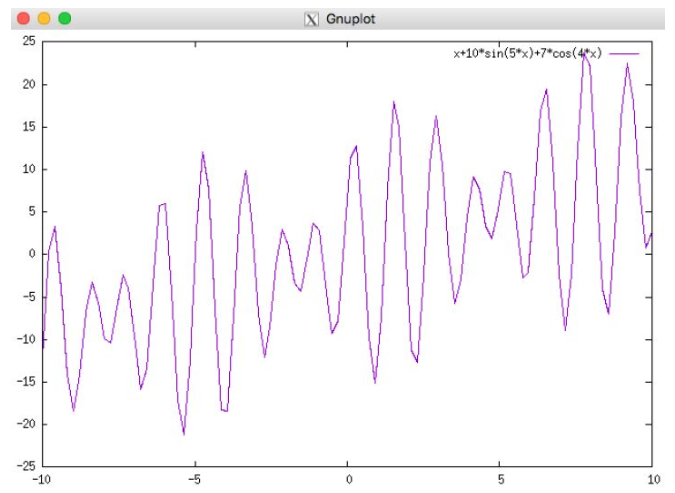

那么如何应用遗传算法如何来找到这个奇怪的函数的最大值呢？  
事实上，不管一个函数的形状多么奇怪，遗传算法都能在很短的时间内找到它在一个区间内的(近似)最大值。

#### 概念1：基因和染色体

在遗传算法中，我们首先需要将要解决的问题映射成一个数学问题，也就是所谓的“数学建模”，那么这个问题的一个可行解即被称为一条“染色体”。一个可行解一般由多个元素构成，那么这每一个元素就被称为染色体上的一个“基因”。

比如说，对于如下函数而言，[1,2,3]、[1,3,2]、[3,2,1]均是这个函数的可行解（代进去成立即为可行解），那么这些可行解在遗传算法中均被称为染色体。

> 3x+4y+5z<100

这些可行解一共有三个元素构成，那么在遗传算法中，每个元素就被称为组成染色体的一个基因。

#### 概念2：适应度函数

在自然界中，似乎存在着一个上帝，它能够选择出每一代中比较优良的个体，而淘汰一些环境适应度较差的个人。那么在遗传算法中，如何衡量染色体的优劣呢？这就是由适应度函数完成的。适应度函数在遗传算法中扮演者这个“上帝”的角色。

遗传算法在运行的过程中会进行N次迭代，每次迭代都会生成若干条染色体。适应度函数会给本次迭代中生成的所有染色体打个分，来评判这些染色体的适应度，然后将适应度较低的染色体淘汰掉，只保留适应度较高的染色体，从而经过若干次迭代后染色体的质量将越来越优良。

#### 概念3：交叉

遗传算法每一次迭代都会生成N条染色体，在遗传算法中，这每一次迭代就被称为一次“进化”。那么，每次进化新生成的染色体是如何而来的呢？——答案就是“交叉”，你可以把它理解为交配。

交叉的过程需要从上一代的染色体中寻找两条染色体，一条是爸爸，一条是妈妈。然后将这两条染色体的某一个位置切断，并拼接在一起，从而生成一条新的染色体。这条新染色体上即包含了一定数量的爸爸的基因，也包含了一定数量的妈妈的基因。

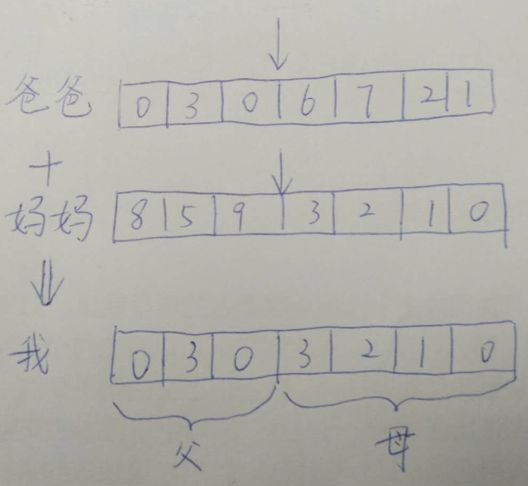

那么，如何从上一代染色体中选出爸爸和妈妈的基因呢？这不是随机选择的，一般是通过轮盘赌算法完成。

在每完成一次进化后，都要计算每一条染色体的适应度，然后采用如下公式计算每一条染色体的适应度概率。那么在进行交叉过程时，就需要根据这个概率来选择父母染色体。适应度比较大的染色体被选中的概率就越高。这也就是为什么遗传算法能保留优良基因的原因。

> 染色体i被选择的概率 = 染色体i的适应度 / 所有染色体的适应度之和

#### 概念4：变异

交叉能保证每次进化留下优良的基因，但它仅仅是对原有的结果集进行选择，基因还是那么几个，只不过交换了他们的组合顺序。这只能保证经过N次进化后，计算结果更接近于局部最优解，而永远没办法达到全局最优解，为了解决这一个问题，我们需要引入变异。

变异很好理解。当我们通过交叉生成了一条新的染色体后，需要在新染色体上随机选择若干个基因，然后随机修改基因的值，从而给现有的染色体引入了新的基因，突破了当前搜索的限制，更有利于算法寻找到全局最优解。

#### 概念5：复制

每次进化中，为了保留上一代优良的染色体，需要将上一代中适应度最高的几条染色体直接原封不动地复制给下一代。

假设每次进化都需生成N条染色体，那么每次进化中，通过交叉方式需要生成N-M条染色体，剩余的M条染色体通过复制上一代适应度最高的M条染色体而来。

#### 遗传算法的流程

在算法初始阶段，它会随机生成一组可行解，也就是第一代染色体。  
然后采用适应度函数分别计算每一条染色体的适应程度，并根据适应程度计算每一条染色体在下一次进化中被选中的概率  
通过“交叉”，生成N-M条染色体；  
再对交叉后生成的N-M条染色体进行“变异”操作；  
然后使用“复制”的方式生成M条染色体；  
到此为止，N条染色体生成完毕！紧接着分别计算N条染色体的适应度和下次被选中的概率。  
这就是一次进化的过程，紧接着进行新一轮的进化。  

遗传算法利用进化过程获得的信息自行组织搜索时，硬度大的个体具有较高的生存概率，并获得更适应环境的基因结构。但是遗传算法也有它自身的缺点：  
（1）随机搜索, 速度不能保证，而且结果也不能保证；  
（2）构造适应度函数较难，有时得凭经验；  
（3）可能存在欺骗问题，有时会产生一些超常的个体，这些个体因竞争力太突出而控制了选择运算过程，从而影响算法的全局优化性能。  

#### 蚁群算法应用到证券市场

随着时间的推移，在该路径上的蚂蚁的数目会经历一个迅速增加，然后稳定在一定的数目上的过程。  
最后随着食物的减少，蚂蚁也会逐渐转移到其它食物源去。  
在证券市场中，投资者会争相购买收益率高风险低的证券，当该种证券收益降到一定程度或风险升高到一定程度后，投资者会转而去购买
别的证券。证券市场上投资者的这种行为很像蚁群觅食时的行为。从而可以将蚁群算法应用到证券市场投资者行为的模拟中去，从而找到最优
的证券投资组合。